## Credit Card Fraud Detection

The objective is to build the best model that can predict fraudulent credit card transactions.

The data is sourced from kaggle https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

C:\Users\Leander Antony A\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Leander Antony A\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Leander Antony A\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exploratory data analysis

In [3]:
df = pd.read_csv("E:\\Documents\\AIML_masters\\course7_Capstone\\creditcard.csv\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# observe the different feature types present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The data is entirely numerical with float and int types, where the class column with interger values is the column that depicts the number of fraudulent and non-fraudulent transactions.**

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#finding the distribution of the class variable

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_18704\3284819083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Blues")


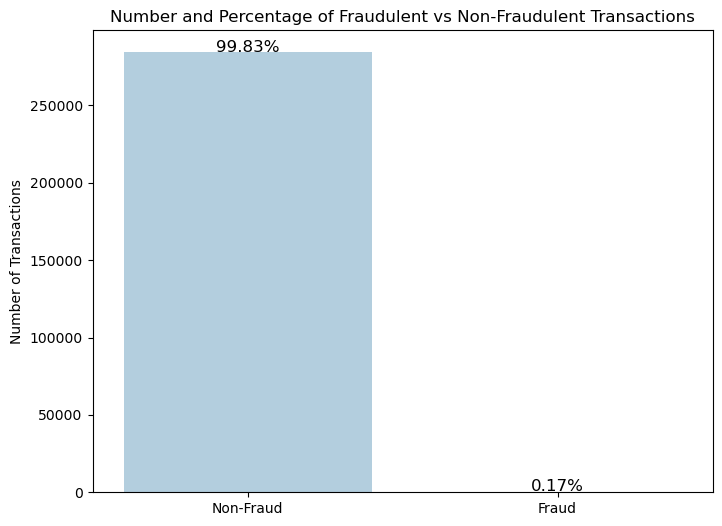

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

labels = ['Non-Fraud', 'Fraud']
counts = classes.values
percentages = [normal_share, fraud_share]

# Create a figure and axis
plt.figure(figsize=(8,6))

# Bar plot for the count of transactions
sns.barplot(x=labels, y=counts, palette="Blues")

# Annotate the plot with the percentages
for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 500, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Add labels and title
plt.ylabel('Number of Transactions')
plt.title('Number and Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

**The data is highly imbalanced with 99.83% of transactions being non-fraudulent**

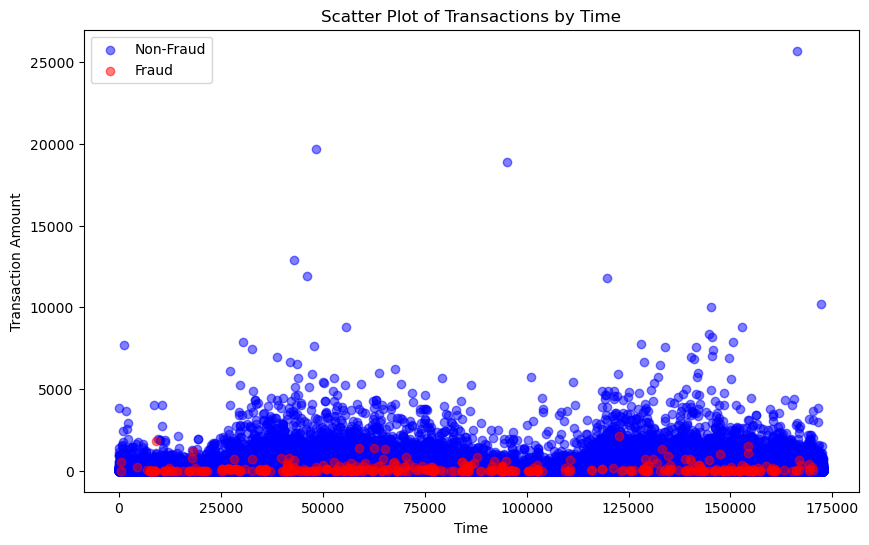

In [8]:
# Create a scatter plot to observe the distribution of classes with time and amount

plt.figure(figsize=(10,6))

# Plotting Non-Fraud transactions (Class = 0)
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], 
            c='blue', label='Non-Fraud', alpha=0.5)

# Plotting Fraud transactions (Class = 1)
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], 
            c='red', label='Fraud', alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

**It is observed that the fraudulent transactions seem pretty consistent with time, so it is dropped and also the fraudulent transactions amount also seem to be on the lower end**

In [9]:
# Drop the 'Time' column
df = df.drop(columns=['Time'])

# Confirm the column is dropped
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

### Splitting the data into train & test data

In [10]:
X = df.drop('Class', axis=1)  
y = df['Class']  

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of the variables

Skewness of each variable in X:
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64


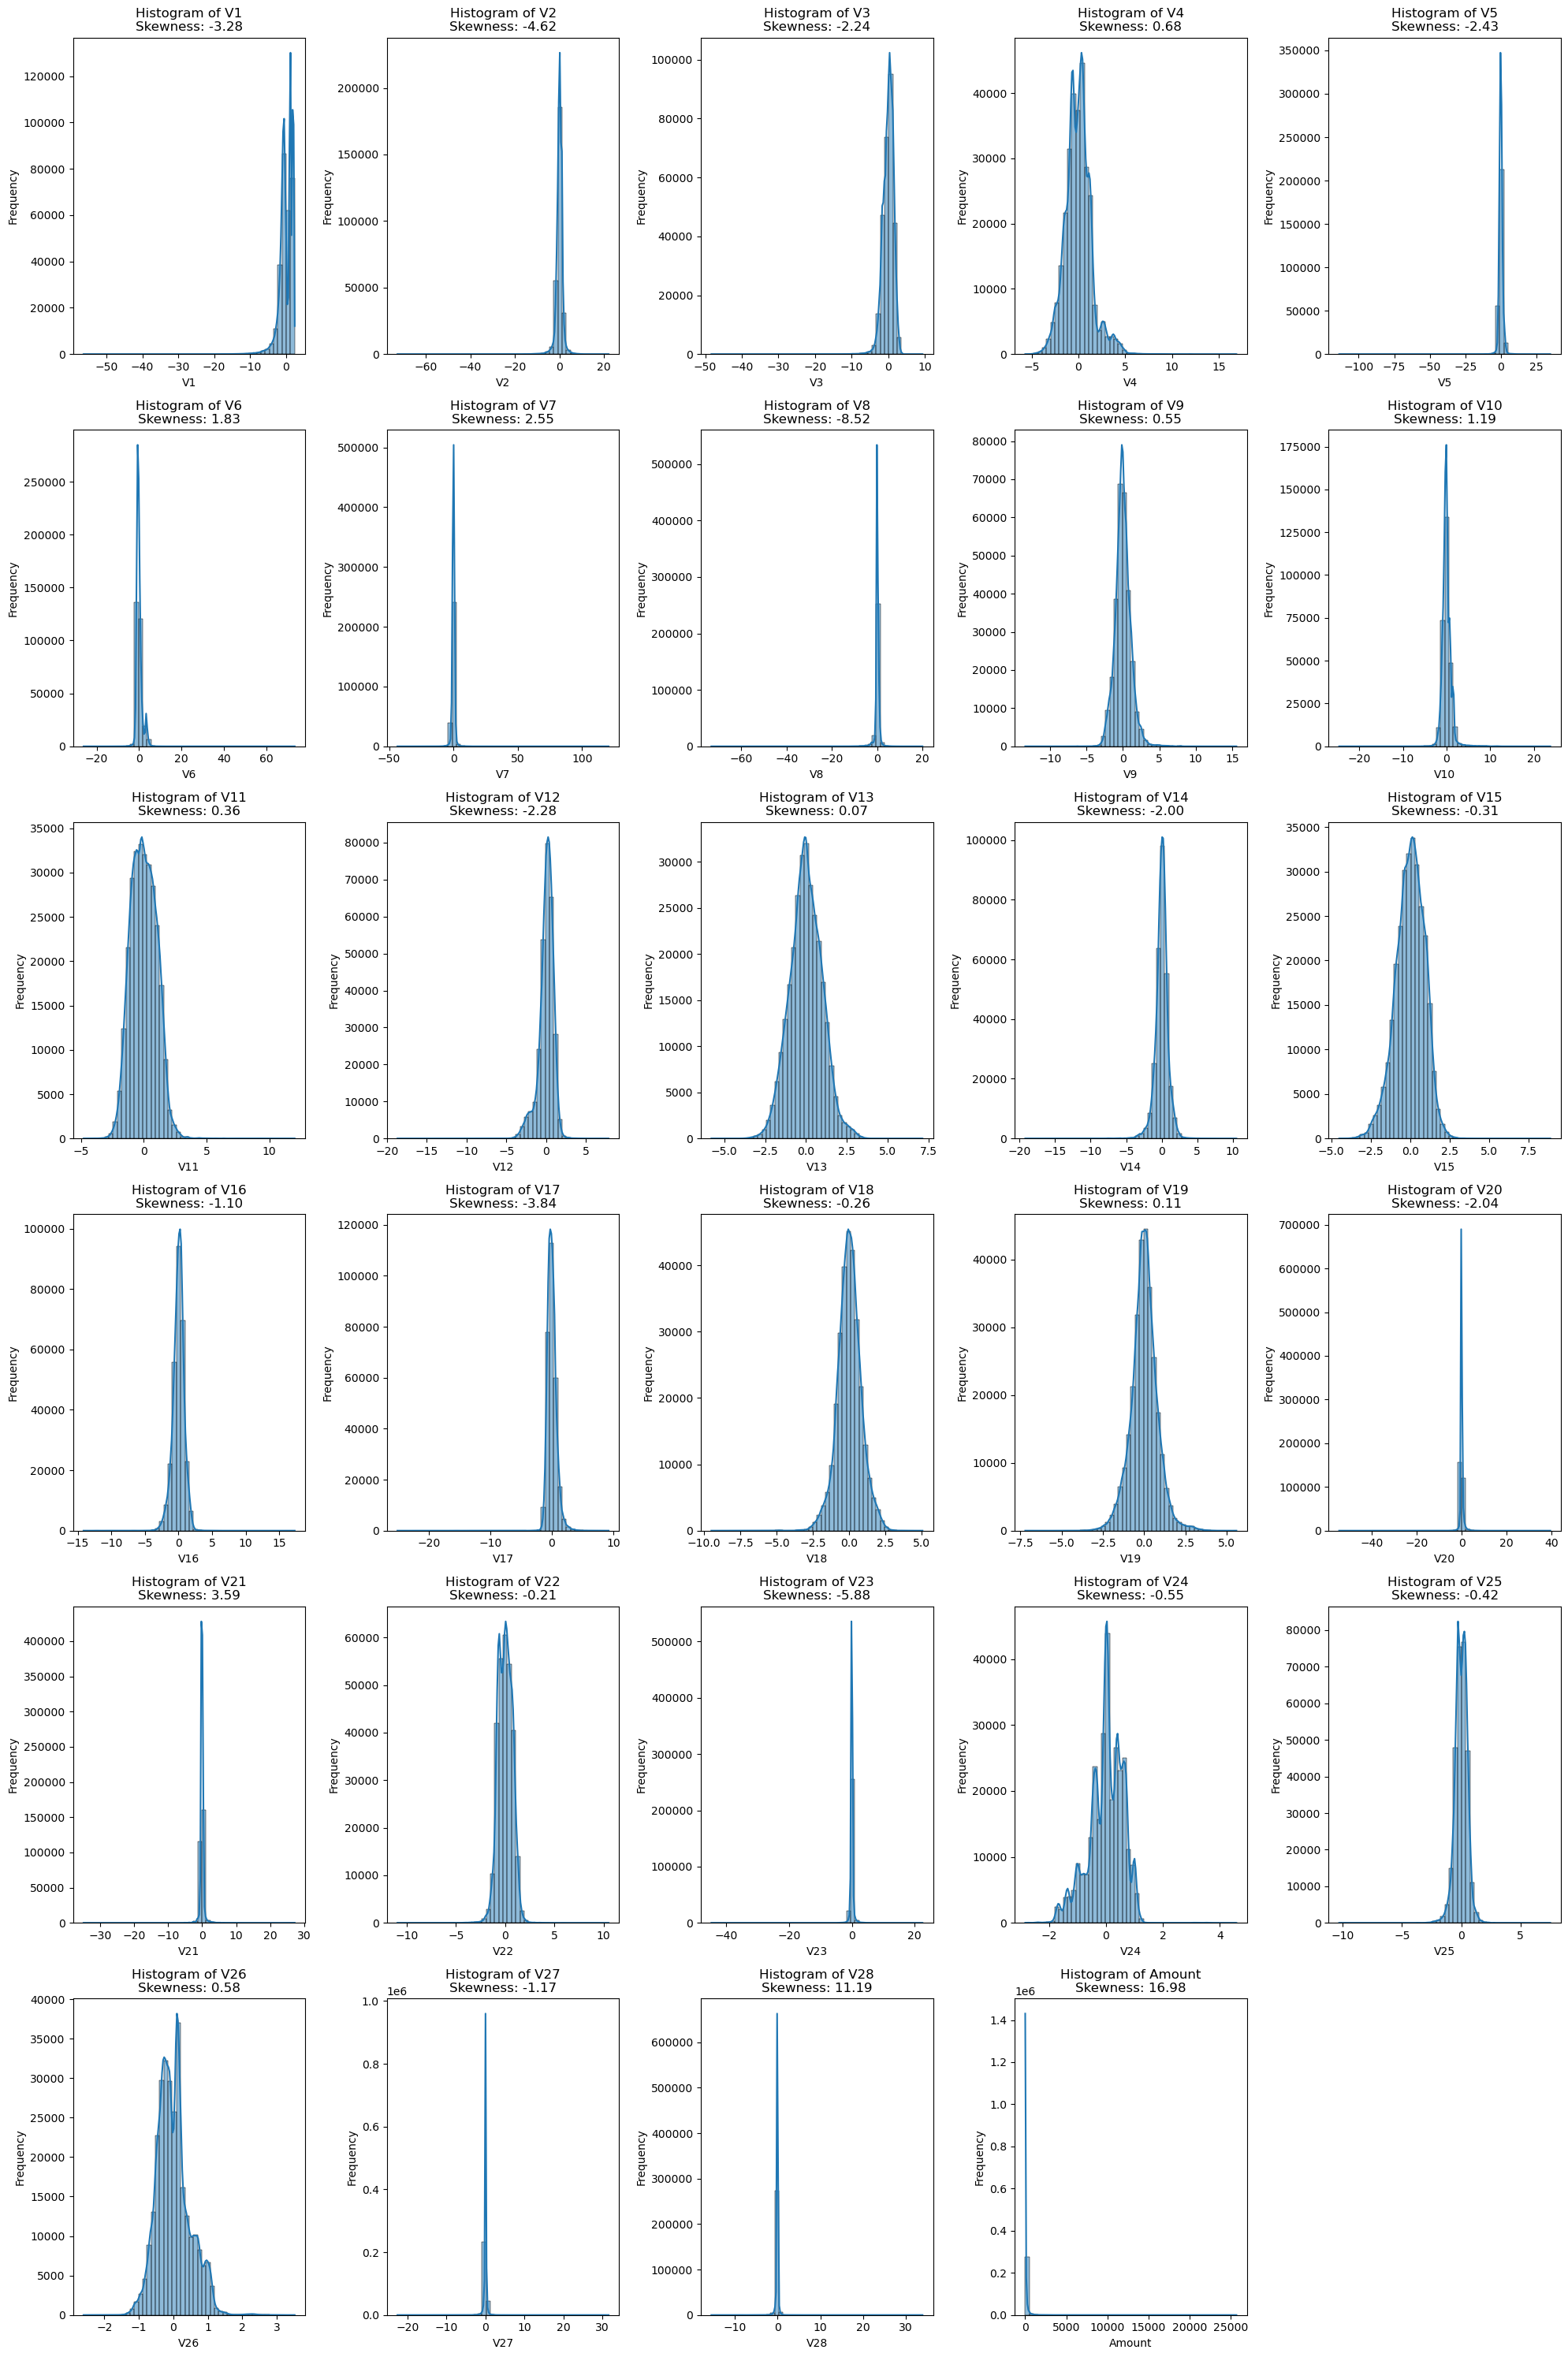

In [13]:
# plot the histogram of all variables from the dataset to see the skewness

# Calculate skewness for all numerical columns in X
skewness = X.skew()

# Print skewness values
print("Skewness of each variable in X:")
print(skewness)

# Plot histograms for each numerical variable in X
num_cols = X.columns

# Set up the matplotlib figure with enough subplots
num_vars = len(num_cols)
ncols = 5  
nrows = np.ceil(num_vars / ncols).astype(int)  

plt.figure(figsize=(20, 5 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(X[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}\nSkewness: {skewness[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**The skewness present in the data is mitigated by using power transformer from the sklearn preprocessing library**

In [14]:
from sklearn.preprocessing import PowerTransformer

# Calculate skewness for all numerical columns in X_train
skewness = X_train.skew()

# Identify columns with skewness greater than a threshold (e.g., absolute value > 1)
skewed_features = skewness[abs(skewness) > 1].index

# Apply PowerTransformer to skewed features in X_train
power_transformer = PowerTransformer()
X_train[skewed_features] = power_transformer.fit_transform(X_train[skewed_features])

# Transform X_test using the same PowerTransformer
X_test[skewed_features] = power_transformer.transform(X_test[skewed_features])

# Calculate new skewness for X_train after transformation
new_skewness = X_train.skew()

# Print new skewness values
print("New Skewness of each variable in X_train after Power Transformation:")
print(new_skewness)

New Skewness of each variable in X_train after Power Transformation:
V1       -0.218136
V2        0.336876
V3       -0.079701
V4        0.687574
V5       -1.349420
V6       -2.001738
V7        2.883669
V8        2.382707
V9        0.541869
V10      -1.329089
V11       0.354102
V12       0.162452
V13       0.064819
V14       0.101347
V15      -0.308419
V16       0.156780
V17      -0.805442
V18      -0.254948
V19       0.106133
V20      -0.879795
V21      -2.076984
V22      -0.219171
V23      -0.255033
V24      -0.549854
V25      -0.436292
V26       0.574980
V27      -0.890209
V28       1.320689
Amount    0.018154
dtype: float64


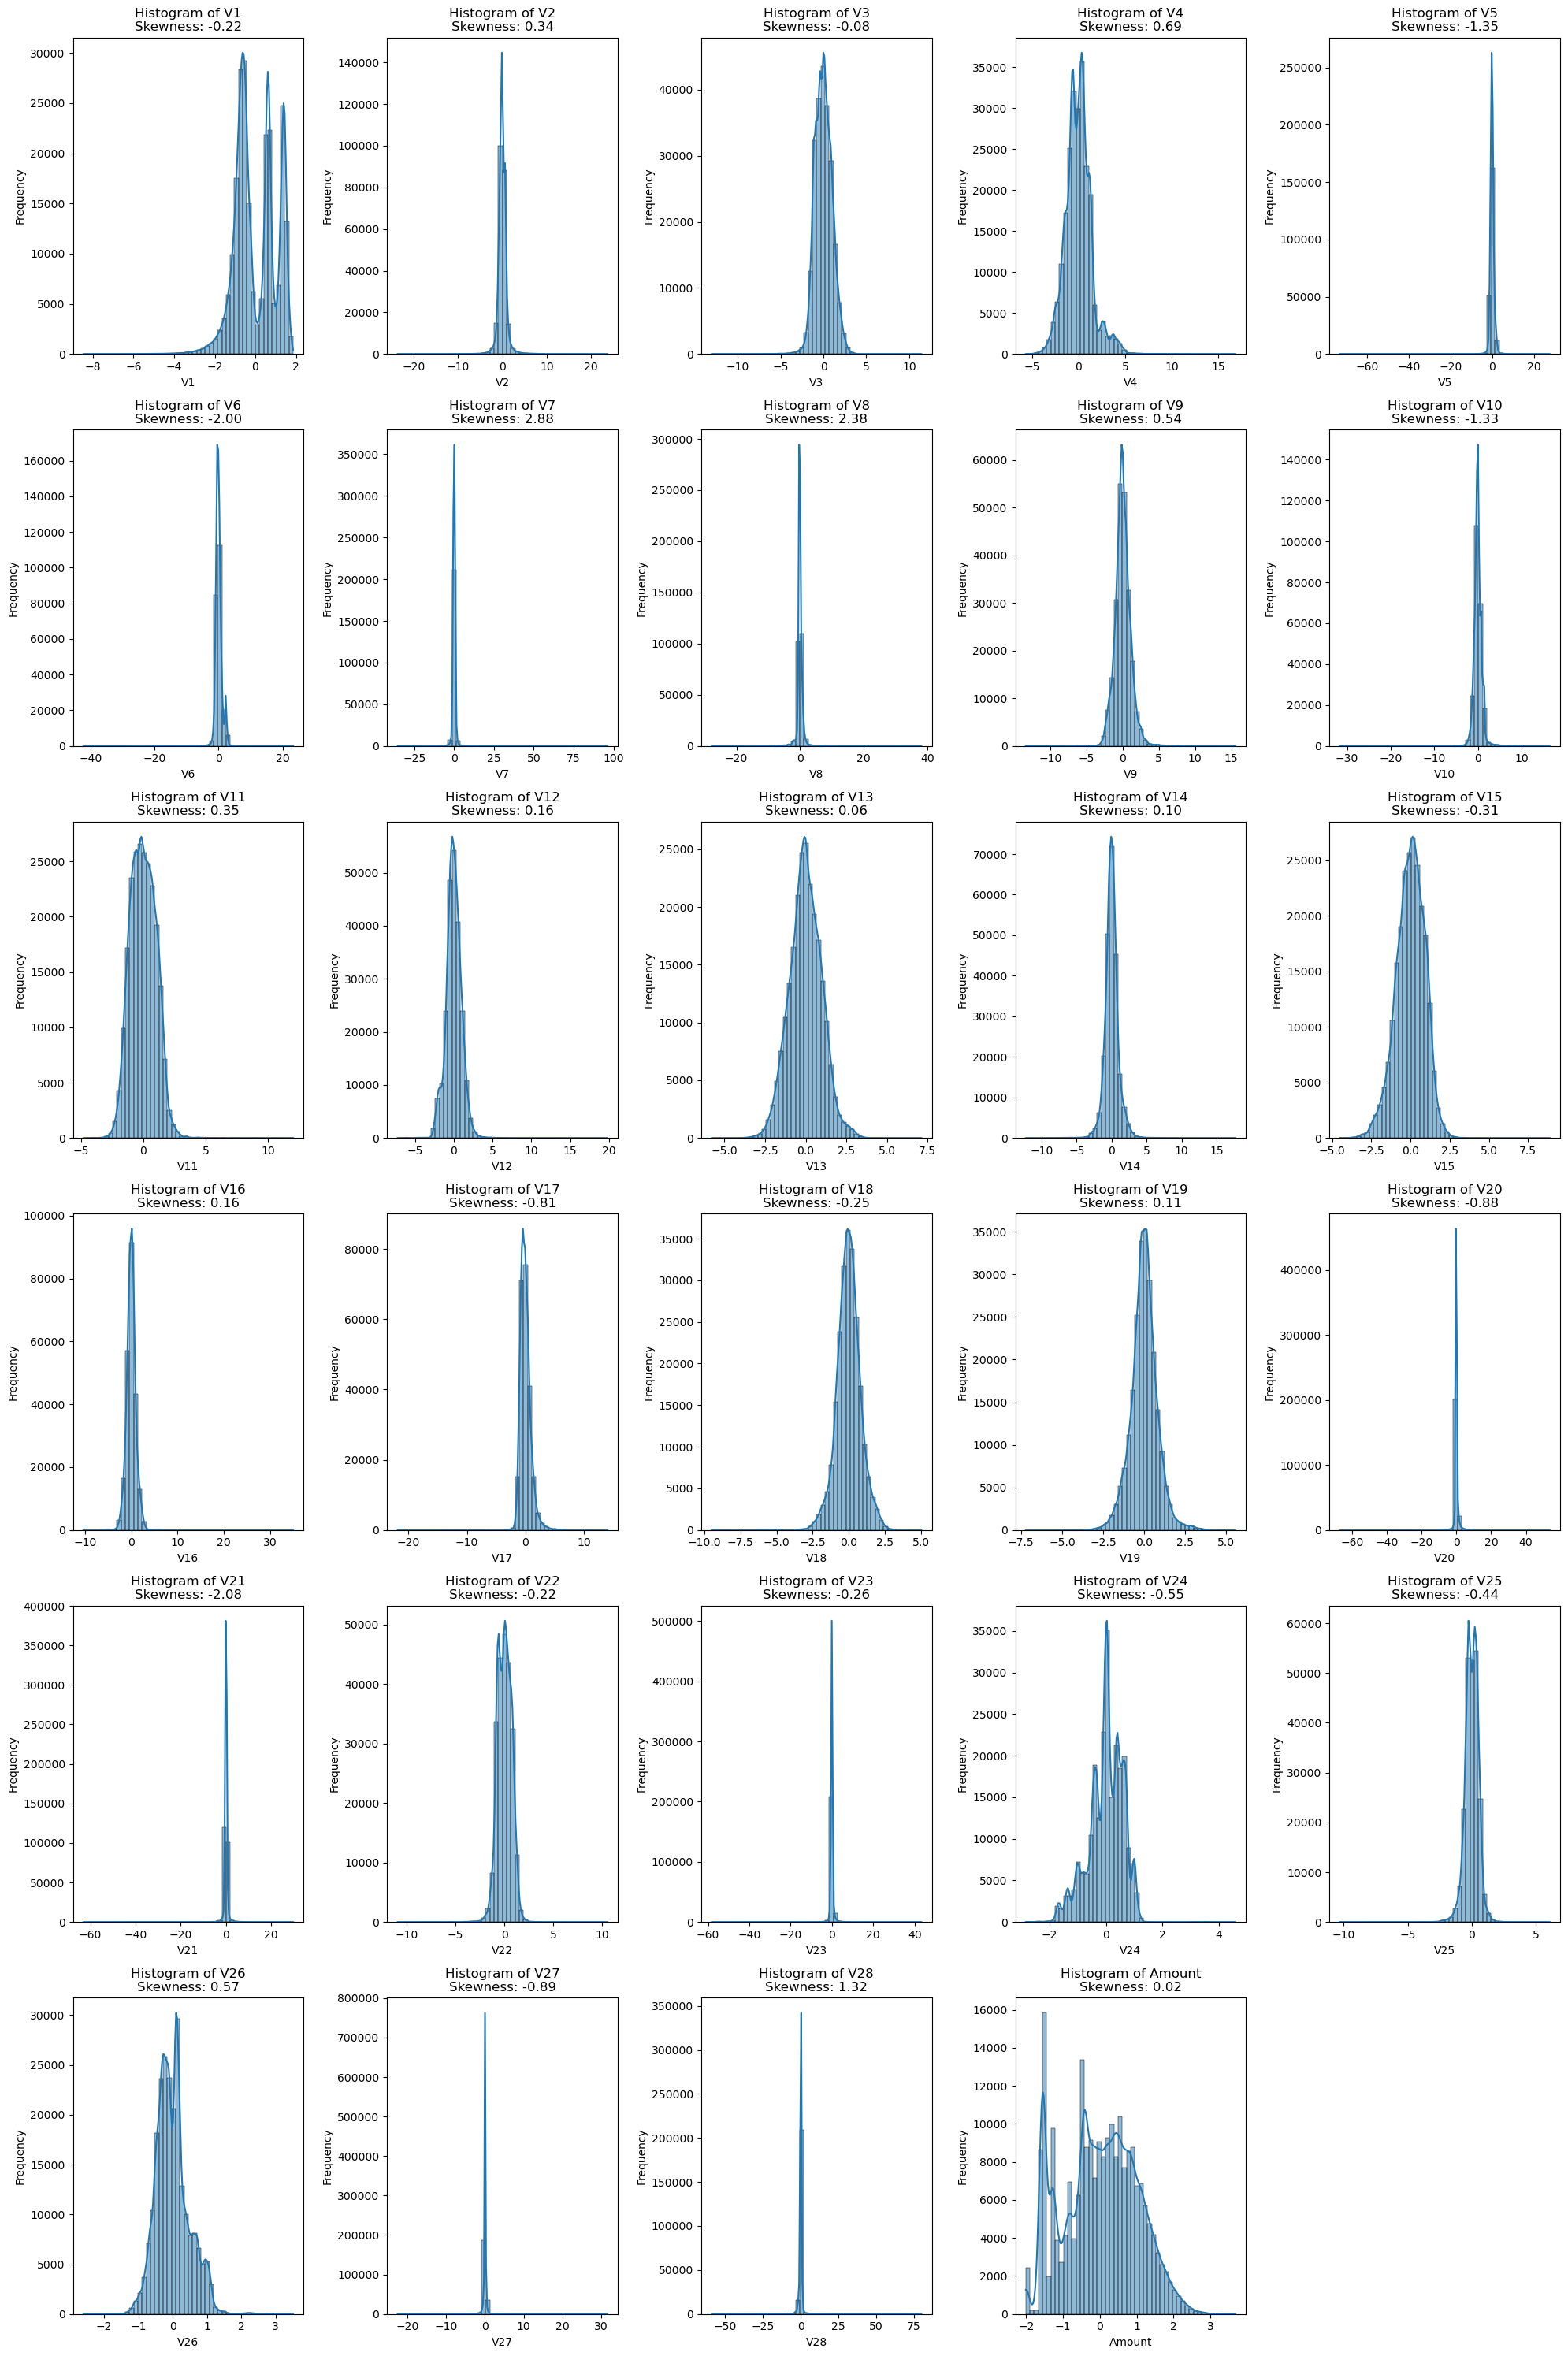

In [15]:
# Plot histograms for each numerical variable in X_train after transformation

num_cols = X_train.columns

# Set up the matplotlib figure with enough subplots

num_vars = len(num_cols)  
ncols = 5  
nrows = np.ceil(num_vars / ncols).astype(int)  

plt.figure(figsize=(20, 5 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(X_train[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}\nSkewness: {new_skewness[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**The skewness in the data has been taken care of as observed from the plots.**

## Model Building
- Build different models on the imbalanced dataset and see the result

In [16]:
# Logistic Regression

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the values for hyperparameter tuning
num_C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  
cv_num = 5  

In [17]:
# perform cross validation

# Create the Logistic Regression model
logistic_model = linear_model.LogisticRegression(solver='liblinear', class_weight='balanced')

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': num_C
}

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=42)

# Set up GridSearchCV with the stratified K-fold
grid_search = GridSearchCV(logistic_model, param_grid, cv=stratified_kfold, scoring='f1', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Parameters: {'C': 0.001}
Best Cross-Validation Score: 0.1125


**These are the best values after performing cross validation**

In [18]:
# Evaluate the model using the best parameters on the entire training set

from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



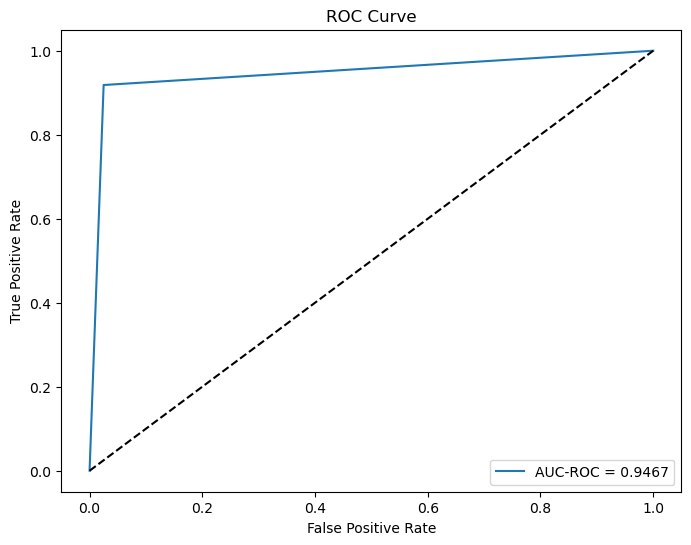

AUC-ROC: 0.9467


In [19]:
# Evaluating using ROC and AUC-ROC scores

from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC-ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC-ROC score
print(f"AUC-ROC: {auc_roc:.4f}")

**The logistic regression model without accounting for class imbalance has an AOC-ROC score of 0.9467.**

## Performing the same with Random forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with class weights balanced
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up parameter grid for hyperparameter tuning

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(random_forest, rf_param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

# Fit the model on X_train and y_train
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score

best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Best Random Forest AUC-ROC Score (Train): {best_rf_score:.4f}")

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest AUC-ROC Score (Train): 0.9828


**The parameters obtained are next used for evaluating**

In [21]:
# Predict on X_test using the best model

y_test_pred_rf = grid_search_rf.predict(X_test)
y_test_pred_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1] 

# Evaluate on test set

test_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
print(f"Random Forest AUC-ROC Score (Test): {test_auc_rf:.4f}")

Random Forest AUC-ROC Score (Test): 0.9833


In [22]:
# Print classification report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



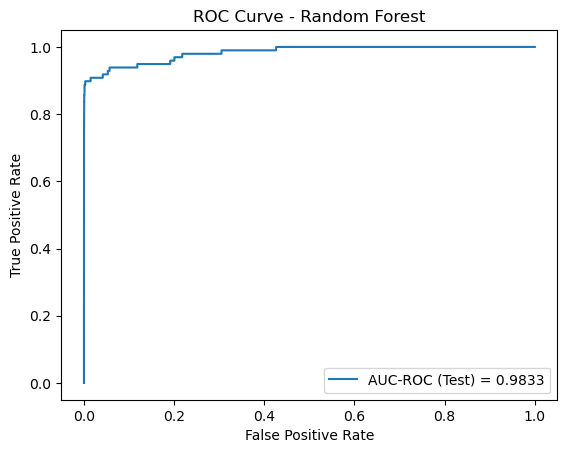

In [23]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_rf)
plt.plot(fpr, tpr, label=f"AUC-ROC (Test) = {test_auc_rf:.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

**The random forest has yielded an AUC-ROC values 0.9833 which is an improvement from the logistic regression model.**

## XGBoost Model

In [24]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42)

# Set up parameter grid for hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, xgb_param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

# Fit the model on X_train and y_train
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best score

best_xgb_params = grid_search_xgb.best_params_
best_xgb_score = grid_search_xgb.best_score_

print(f"Best XGBoost Parameters: {best_xgb_params}")
print(f"Best XGBoost AUC-ROC Score (Train): {best_xgb_score:.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best XGBoost AUC-ROC Score (Train): 0.9835


In [25]:
# Predict on X_test using the best model

y_test_pred_xgb = grid_search_xgb.predict(X_test)
y_test_pred_proba_xgb = grid_search_xgb.predict_proba(X_test)[:, 1]

# Evaluate on test set

test_auc_xgb = roc_auc_score(y_test, y_test_pred_proba_xgb)
print(f"XGBoost AUC-ROC Score (Test): {test_auc_xgb:.4f}")

XGBoost AUC-ROC Score (Test): 0.9811


In [26]:
# Print classification report

print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.89      0.48        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      0.74     56962
weighted avg       1.00      1.00      1.00     56962



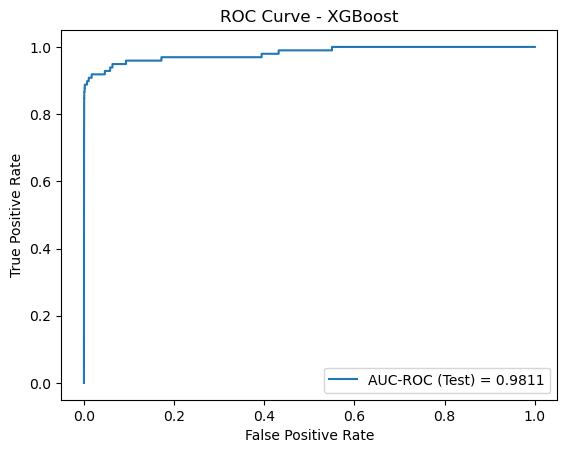

In [27]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_xgb)
plt.plot(fpr, tpr, label=f"AUC-ROC (Test) = {test_auc_xgb:.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

**The XGBoost model has yielded an AUC-ROC score of 0.9811 slightly lesser than the random forest model.**

## Model building with balancing Classes

##### Perform class balancing with :

- SMOTE
- ADASYN

## Resampling the training data using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 227451, 1: 227451})


**The classes are now balanced using SMOTE**

In [29]:
# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Fit and resample the training data
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the class distribution
print("Class distribution after ADASYN:", Counter(y_train_adasyn))

Class distribution after ADASYN: Counter({0: 227451, 1: 227434})


**The classes are now balanced using ADASYN**

## Model Building

- Building different models on the balanced dataset and see the result

### Logistic Regression

In [30]:
# Fit the Logistic Regression model

logistic_model_smote = linear_model.LogisticRegression(solver='liblinear', class_weight='balanced')
logistic_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the test set

y_pred_smote = logistic_model_smote.predict(X_test)
print("ROC AUC score for Logistic Regression (SMOTE):", roc_auc_score(y_test, y_pred_smote))

ROC AUC score for Logistic Regression (SMOTE): 0.9444643431373675


In [31]:
# Print classification report
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



**The AUC-ROC score for the balanced logistic regression model is 0.944**

### Random Forest Model

In [32]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up the parameter grid for GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Create a StratifiedKFold object for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV with the stratified K-fold
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=stratified_kfold, scoring='f1', n_jobs=-1)

# Fit on SMOTE data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Get the best parameters and score for SMOTE data

best_params_rf_smote = grid_search_rf.best_params_
best_score_rf_smote = grid_search_rf.best_score_

print(f"Random Forest Best Parameters (SMOTE): {best_params_rf_smote}")
print(f"Random Forest Best Cross-Validation Score (SMOTE): {best_score_rf_smote:.4f}")

Random Forest Best Parameters (SMOTE): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Cross-Validation Score (SMOTE): 0.9998


In [33]:
# Fit on ADASYN data
grid_search_rf.fit(X_train_adasyn, y_train_adasyn)

# Get the best parameters and score for ADASYN data

best_params_rf_adasyn = grid_search_rf.best_params_
best_score_rf_adasyn = grid_search_rf.best_score_

print(f"Random Forest Best Parameters (ADASYN): {best_params_rf_adasyn}")
print(f"Random Forest Best Cross-Validation Score (ADASYN): {best_score_rf_adasyn:.4f}")

Random Forest Best Parameters (ADASYN): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Cross-Validation Score (ADASYN): 0.9994


### XGBoost Model

In [34]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train_smote) - sum(y_train_smote)) / sum(y_train_smote), random_state=42)

# Set up the parameter grid for GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3]
}

# Create a StratifiedKFold object for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV with the stratified K-fold
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=stratified_kfold, scoring='f1', n_jobs=-1)

# Fit on SMOTE data
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Get the best parameters and score for SMOTE data
best_params_xgb_smote = grid_search_xgb.best_params_
best_score_xgb_smote = grid_search_xgb.best_score_

print(f"XGBoost Best Parameters (SMOTE): {best_params_xgb_smote}")
print(f"XGBoost Best Cross-Validation Score (SMOTE): {best_score_xgb_smote:.4f}")

XGBoost Best Parameters (SMOTE): {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
XGBoost Best Cross-Validation Score (SMOTE): 0.9997


In [35]:
# Fit on ADASYN data
grid_search_xgb.fit(X_train_adasyn, y_train_adasyn)

# Get the best parameters and score for ADASYN data
best_params_xgb_adasyn = grid_search_xgb.best_params_
best_score_xgb_adasyn = grid_search_xgb.best_score_

print(f"XGBoost Best Parameters (ADASYN): {best_params_xgb_adasyn}")
print(f"XGBoost Best Cross-Validation Score (ADASYN): {best_score_xgb_adasyn:.4f}")

XGBoost Best Parameters (ADASYN): {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
XGBoost Best Cross-Validation Score (ADASYN): 0.9996


### Evaluation of both models on the test set using the best parameters derived earlier

In [36]:
# Function to evaluate model and print ROC curve
from sklearn.metrics import roc_curve, auc

def evaluate_model(model, X_test, y_test, model_name):
    
    # Make predictions on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plotting ROC Curve
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

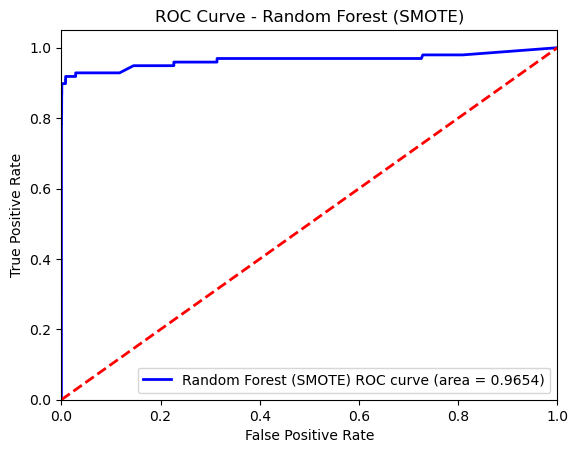

In [37]:
# Evaluate Random Forest on SMOTE

best_rf_model_smote = RandomForestClassifier(**best_params_rf_smote, random_state=42)
best_rf_model_smote.fit(X_train_smote, y_train_smote)
rf_auc_smote = evaluate_model(best_rf_model_smote, X_test, y_test, "Random Forest (SMOTE)")

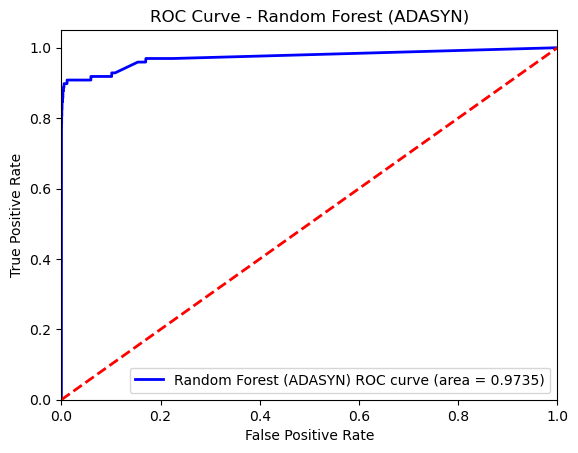

In [38]:
# Evaluate Random Forest on ADASYN

best_rf_model_adasyn = RandomForestClassifier(**best_params_rf_adasyn, random_state=42)
best_rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
rf_auc_adasyn = evaluate_model(best_rf_model_adasyn, X_test, y_test, "Random Forest (ADASYN)")

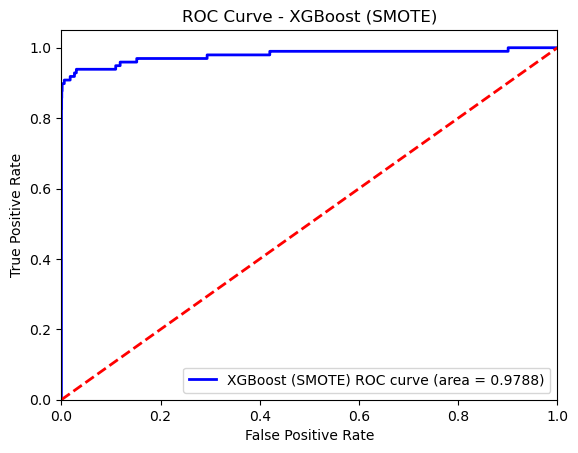

In [39]:
# Evaluate XGBoost on SMOTE

best_xgb_model_smote = xgb.XGBClassifier(**best_params_xgb_smote, scale_pos_weight=(len(y_train_smote) - sum(y_train_smote)) / sum(y_train_smote), random_state=42)
best_xgb_model_smote.fit(X_train_smote, y_train_smote)
xgb_auc_smote = evaluate_model(best_xgb_model_smote, X_test, y_test, "XGBoost (SMOTE)")

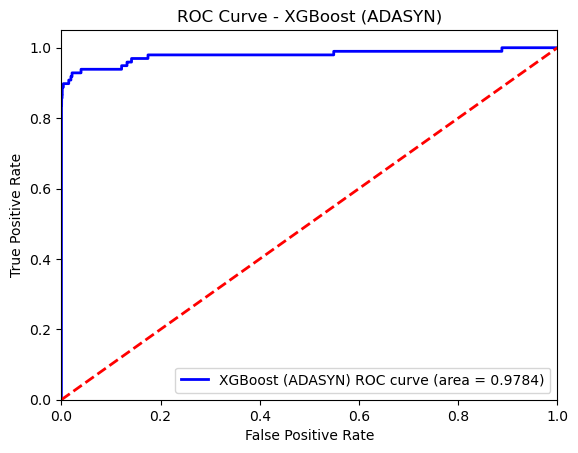

In [40]:
# Evaluate XGBoost on ADASYN

best_xgb_model_adasyn = xgb.XGBClassifier(**best_params_xgb_adasyn, scale_pos_weight=(len(y_train_adasyn) - sum(y_train_adasyn)) / sum(y_train_adasyn), random_state=42)
best_xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
xgb_auc_adasyn = evaluate_model(best_xgb_model_adasyn, X_test, y_test, "XGBoost (ADASYN)")

In [41]:
# Print AUC scores

print(f"Random Forest AUC (SMOTE): {rf_auc_smote:.4f}")
print(f"Random Forest AUC (ADASYN): {rf_auc_adasyn:.4f}")
print(f"XGBoost AUC (SMOTE): {xgb_auc_smote:.4f}")
print(f"XGBoost AUC (ADASYN): {xgb_auc_adasyn:.4f}")

Random Forest AUC (SMOTE): 0.9654
Random Forest AUC (ADASYN): 0.9735
XGBoost AUC (SMOTE): 0.9788
XGBoost AUC (ADASYN): 0.9784
